In [ ]:
[srkjghwjhgiwr, gnbwrkjgbewihrgbf, gWJRIBOERB,   WRHGKBK, ETHNQEOGKU, edrgnkenr,  ergjnkegj]

# Занятие 13. Обработка естественного языка
## Что такое NLP?
**Обработка естественного языка** (NLP) – это технология машинного обучения, которая дает компьютерам возможность интерпретировать, манипулировать и понимать человеческий язык. Сегодня организации имеют большие объемы голосовых и текстовых данных из различных каналов связи, таких как электронные письма, текстовые сообщения, новостные ленты социальных сетей, видео, аудио и многое другое. Они используют программное обеспечение NLP для автоматической обработки этих данных, анализа намерений или настроений в сообщении и реагирования на человеческое общение в режиме реального времени.

Обработка естественного языка имеет решающее значение для эффективного анализа текстовых и речевых данных. Таким образом можно преодолевать различия в диалектах, сленге и грамматических нарушениях, типичных для повседневных разговоров. Компании используют этот метод для нескольких автоматизированных задач, таких как:

- Обработка, анализ и архивирование больших документов;
- Анализ отзывов клиентов или записей колл-центра;
- Запуск чат-ботов для автоматизированного обслуживания клиентов;
- Ответы на вопросы «кто, что, когда и где»;
- Классификация и извлечение текста.

Вы также можете интегрировать NLP в приложения, ориентированные на клиента, чтобы более эффективно общаться с клиентами. Например, чат-бот анализирует и сортирует запросы клиентов, автоматически отвечая на распространенные вопросы и перенаправляя сложные запросы в службу поддержки. Эта автоматизация помогает снизить затраты, избавить агентов от необходимости тратить время на избыточные запросы и повышает удовлетворенность клиентов.

## Как внедрять NLP?
Как правило, процесс NLP начинается со сбора и подготовки неструктурированных текстовых или речевых данных из таких источников, как облачные хранилища данных, опросы, электронные письма или внутренние приложения бизнес-процессов.

### Шаг 1. Предварительная обработка
Программное обеспечение NLP использует методы предварительной обработки, такие как токенизация, стемминг, лемматизация и удаление стоп-слов для подготовки данных для различных приложений. 

* **Токенизация** — процесс разделения текста на составляющие (их называют «токенами»). Чаще всего текст разделяется на токены по словам или предложениям. В русском и английском языках в качестве индикаторов, по которым осуществляется разделение, используются:
    * для слов $-$ пробел;
    * для предложений $-$ точка, вопросительный или восклицательный знак.
* **Стемминг** — процесс нахождения основы слова. Основа слова $-$ это часть слова без его окончания (вы такое на уроках русского языка выделяли), основа слова не всегда совпадает с его грамматическим корнем;
* **Лемматизация** — процесс приведения слова к его нормальной форме. На уроках русского языка вам рассказывали, что нормальная форма для существительного — это слово в именительном падеже и единственном числе; для прилагательных нормальная форма тоже выглядит как слово в именительном падеже и единственном числе, но добавляется ещё род — он должен быть мужской. Нормальная форма глагола — его начальная форма, инфинитив. Задача лемматизации сложнее стемминга и выполняется после него.
* **Стоп-слова** — это слова, которые выкидываются из текста до/после обработки текста. Когда мы применяем машинное обучение к текстам, такие слова могут добавить много шума, поэтому необходимо избавляться от нерелевантных слов. Под стоп-словами обычно понимают артикли, междометия, союзы и т.д., которые не несут смысловой нагрузки. При этом надо понимать, что не существует универсального списка стоп-слов, все зависит от конкретного случая.

### Шаг 2. Выделение новых признаков из текста
Вы уже знаете, что алгоритмы машинного обучения не могут напрямую работать с сырым текстом, поэтому необходимо конвертировать текст в наборы цифр (векторы). Это называется извлечением признаков.
Есть, как минимум, три подхода к преобразованию текста в числовой формат:
- мешок слов;
- токенизация;
- замена слов частотами их встречаемости.

#### Мешок слов (bag of words)
Наиболее интуитивно понятный способ сделать это $-$ использовать представление в виде набора слов:

1. Присвойте фиксированный целочисленный идентификатор каждому слову, встречающемуся в любом документе обучающего набора (например, путем построения словаря из слов с целочисленными индексами, как у вас было в задании с обнаружением злоумышленника).

2. Далее для каждого документа `i` подсчитайте количество вхождений каждого слова `w` и сохраните его в матрицу `X[i, j]` как значение признака `j`, где `j` $-$ индекс слова `w` в словаре.

Представление в виде мешка слов подразумевает, что `n_features` $-$ это количество отдельных слов в корпусе: обычно это число превышает 100 000.

Если `n_samples == 10000`, то для хранения `X` в виде массива NumPy типа `float32` потребуется $10000\ *\ 100000\ * 4\ байта\ =\ 4\ ГБ$ оперативной памяти, что едва ли возможно на современных компьютерах.

К счастью, большинство значений в `X` будут равны нулю, поскольку для данного документа будет использоваться менее нескольких тысяч отдельных слов. По этой причине мы говорим, что пакеты слов обычно представляют собой многомерные разреженные наборы данных. Мы можем сэкономить много памяти, сохраняя в памяти только ненулевые части векторов признаков.

Матрицы из модуля `scipy.sparse` $-$ это структуры данных, которые делают именно это, и scikit-learn имеет встроенную поддержку этих структур.

#### Токенизация текста
Предварительная обработка текста, маркировка и фильтрация стоп-слов - все это включено в CountVectorizer, который создает словарь объектов и преобразует документы в векторы объектов:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
сount_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

#### TF-IDF
Подсчёт встречаемости слова в тексте $-$ хорошее начало, но есть проблема: более длинные документы будут иметь более высокие средние значения количества встречаемости, чем более короткие документы, даже если в них могут обсуждаться одни и те же темы.

Чтобы избежать этих потенциальных расхождений, достаточно разделить количество вхождений каждого слова в документе на общее количество слов в документе: эти новые признаки называются `tf` для **частотности терминов (term frequencies)**.

Еще одним усовершенствованием в дополнение к tf является уменьшение весовых коэффициентов для слов, которые встречаются во многих документах корпуса и, следовательно, менее информативны, чем те, которые встречаются только в меньшей части корпуса. Это уменьшение масштаба называется `tf–idf`, что означает “Частота термина, умноженная на обратную частоту документа” (“Term Frequency times Inverse Document Frequency”).

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

### Шаг 3. Обучение
Исследователи используют предварительно обработанные данные для обучения моделей NLP с помощью машинного обучения для выполнения конкретных приложений на основе предоставленной текстовой информации. Обучение алгоритмов NLP требует предоставления программного обеспечения большими выборками данных для повышения их точности. 

## Пример анализа текcтовых данных
В качестве примера будем анализировать тексты СМС-сообщений и классифицировать их на два класса: спамовые сообщения и обычные.

### Загрузка и знакомство с данными

In [1]:
#!pip3 install nltk
# модуль для работы с текстовыми данными
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> в
Command 'в' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading packa

       |   Package sentiwordnet is already up-to-date!
       | Downloading package shakespeare to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package shakespeare is already up-to-date!
       | Downloading package sinica_treebank to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package sinica_treebank is already up-to-date!
       | Downloading package smultron to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package smultron is already up-to-date!
       | Downloading package snowball_data to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package snowball_data is already up-to-date!
       | Downloading package spanish_grammars to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package spanish_grammars is already up-to-date!
       | Downloading package state_union to
       |     /home/agat.local/s.bulganin/nltk_data...
       |   Package state_union is already up-to-date!
       | Download


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> c

Data Server:
  - URL: <https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml>
  - 7 Package Collections Available
  - 113 Individual Packages Available

Local Machine:
  - Data directory: /home/agat.local/s.bulganin/nltk_data

---------------------------------------------------------------------------
    s) Show Config   u) Set Server URL   d) Set Data Dir   m) Main Menu
---------------------------------------------------------------------------
Config> m

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [2]:
# подгрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# загрузим данные
PATH_TO_DATA = "data/archive/spam.csv"
data_all = pd.read_csv(PATH_TO_DATA, encoding = "ISO-8859-1")
data_all.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# посмотрим информацию о данных
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# удалим столбцы с большим количеством пропусков
data_all.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Итак, перед нами всего два атрибута. `v1` $-$ целевой атрибут, содержащий в текстовом представлении метку сообщения; `v2` $-$ атрибут, содержащий в текстовом представлении СМС-сообщения. 

In [5]:
data_all.groupby(['v1']).describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

Можем посмотреть, как выглядит самое частое спамовое сообщение. Возможно, мы не понимаем, из-за каких именно слов мы определяем это сообщение как спам, но разрабатываемая модель должна найти закономерность.

Также обратим внимание, что выборка несбалансирована, спамовых сообщений гораздо меньше. В принципе, это можно свести к задаче поиска аномалий и использовать предварительно модель леса изолирующих деревьев.

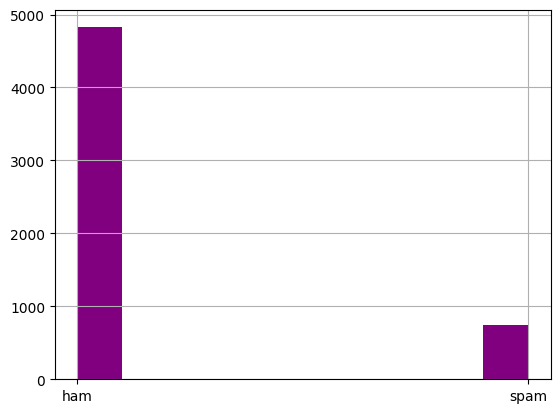

In [6]:
data_all['v1'].hist(bins=10, color='purple');

### Конструирование признаков
Ещё до кодирования текста можно попробовать извлечь какие-нибудь признаки из данных, пусть их будет не очень много. Например, может ли длина текста СМС указывать на спам? Почему бы и нет?

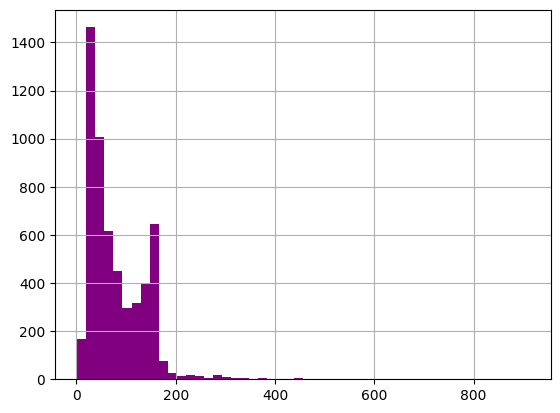

In [7]:
data_all['v3'] = data_all['v2'].apply(len)
data_all['v3'].hist(bins=50, color='purple');

Большая часть сообщений имеет длину до 200 символов. 

In [8]:
data_all[data_all['v3'] == data_all['v3'].min()].iloc[0]

v1    ham
v2     Ok
v3      2
Name: 1924, dtype: object

In [9]:
data_all[data_all['v3'] == data_all['v3'].max()].iloc[0]

v1                                                  ham
v2    For me the love should start with attraction.i...
v3                                                  910
Name: 1084, dtype: object

Как видим, самое длинное сообщение $-$ сообщение, не содержащее спама.

Попробуем визуально найти закономерность между распределением длины сообщения для каждого класса.

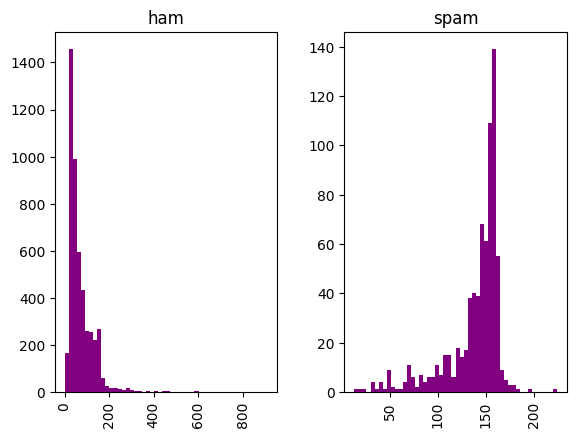

In [10]:
data_all.hist(column='v3', by='v1', color='purple', bins=50);

Визуально можно увидеть, что длина спамового сообщения тяготеет к 150 символам, но не превышает 250 символов. Напротив, длина сообщений, которые не содержат спама, может быть длиннее 250 символов, но тяготеет к средней длине в 50 символов.

### Предобработка текста

In [11]:
from nltk.corpus import stopwords
# что содержится в списке стоп-слов английского языка?
stopwords.words('english')[20:40]

['himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this']

In [12]:
# а сколько там всего стоп-слов?
len(stopwords.words('english'))

179

Эти стоп-слова нужно будет исключить из текста сообщений, помимо этого, необходимо избавить тексты от пунктуации.

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def text_processing(text):
    # удаление пунктуации
    remove_punc = [c for c in text if c not in string.punctuation]
    # склеим слова из списка в строку с пробелом в качестве разделителя
    remove_punc = ''.join(remove_punc)
    
    # удалим стоп-слова 
    return [word for word in remove_punc.split(' ') if word not in stopwords.words('english')]

Теперь векторизуем наш текст. Используем токенизацию в качестве метода кодирования, указав в качестве функции, которая преобразует наш текст перед векторизацией, выше описанную функцию.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv_transformer = CountVectorizer(analyzer=text_processing).fit(data_all['v2'])
text_messages_bow = cv_transformer.transform(data_all['v2'])
text_messages_bow.shape

(5572, 11498)

Мы получили мешок слов $-$ разряжённую матрицу, в которой у нас 11 498 слов (каждое слово $-$ отдельный признак). Мы даже можем посчитать, насколько наша матрица заполнена.

In [16]:
text_messages_bow.nnz / (text_messages_bow.shape[0] * text_messages_bow.shape[1]) * 100

0.08847632541855964

В получившейся матрице только 8.8% ненулевых значений, всё остальное содержимое матрицы мешка слов $-$ нули.

Теперь мы можем преобразовать наш мешок слов в матрицу частот встречаемости слов, умноженных на обратные частоты встречаемости документов (tf-idf).

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(text_messages_bow)
text_tfidf = tf_transformer.transform(text_messages_bow)
text_tfidf.shape

(5572, 11498)

Зная частоты слов, модель сможет выявить закономерности их встречаемости для двух классов.

Предобработаем целевой атрибут и объединим с получившейся матрицей.

In [18]:
data_all.drop(columns=['v2'], inplace=True)
data_all['v1'] = data_all['v1'].apply(lambda x: 1 if x == 'spam' else 0)
data_all.head(5)

,v1,v3
0,0,111
1,0,29
2,1,155
3,0,49
4,0,61


In [19]:
# преобразуем в разряженную матрицу
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import MinMaxScaler 

data_scaled = MinMaxScaler().fit_transform(data_all[['v3']])
lenth_csr_matrix = csr_matrix(data_scaled)
sum_data = hstack((text_tfidf, lenth_csr_matrix))

Наши данные предобработаны и готовы для обучения модели.

### Обучение
Попробуем классическую модель машинного обучения, которая ещё на заре эпохи машинного обучения защищала пользователей электронной почты от спама. Это модель Наивного Байеса.

In [20]:
# разделим данные
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sum_data, data_all['v1'], 
                                                    test_size=0.3, stratify=data_all['v1'])

In [21]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(X_train, y_train)

MultinomialNB()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(bayes.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1517
           1       0.69      1.00      0.82       155

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



Модель показывает хорошие результаты. Конечно, можно было бы выбрать наиболее сильные модели или поискать более оптимальные параметры для этой модели, однако этот пример был приведён в учебных целях. На реальных данных, конечно, нужно применять приёмы оптимизации модели.